In [1]:
#Importacion de librerias necesarias
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

In [2]:
# Cargar el archivo CSV 
dataframe = pd.read_csv("datos1.csv")

In [36]:
# Mostrar los primeros registros del DataFrame
dataframe.head(5)

,ciclo_academico,region,porcentaje_de_beca,formas_de_pago,edad,porcentaje_de_discapacidades,numero_discapacidades,numero_reprobaciones,aab1_nota,acdb1_nota,...,Estatus_curso,Discapacidad,Status,Tipo_de_pago,Descripcion_beca,Descripcion_descuento,Convenios_contratos,Formas_pago,Tipo_discapacidad,Curso
0,6,0,10.0,1,24.0,0,0,0,3.05,3.5,...,0,0,0,2,0,0,0,1,4,28
1,6,0,10.0,1,24.0,0,0,0,2.81,3.5,...,0,0,0,2,0,0,0,1,4,24
2,6,0,10.0,1,24.0,0,0,0,2.69,3.5,...,0,0,0,2,0,0,0,1,4,25
3,6,0,10.0,1,24.0,0,0,0,1.97,3.5,...,0,0,0,2,0,0,0,1,4,26
4,6,0,10.0,1,24.0,0,0,0,2.64,3.5,...,0,0,0,2,0,0,0,1,4,27


Verificamos que no existan datos nulos

In [37]:
null_counts = dataframe.isnull().mean() * 100
# Ordenar los porcentajes de valores nulos de forma descendente
null = null_counts.sort_values(ascending=False)
# Obtener los valores más altos
v = null.head(410)
# Imprimir los valores más altos
print(v.round(2))

ciclo_academico                 0.0
tasa_aprobacion                 0.0
Tipo_discapacidad               0.0
Formas_pago                     0.0
Convenios_contratos             0.0
Descripcion_descuento           0.0
Descripcion_beca                0.0
Tipo_de_pago                    0.0
Status                          0.0
Discapacidad                    0.0
Estatus_curso                   0.0
Tipo_de_ingreso                 0.0
Tipo_de_est_programa            0.0
Sexo                            0.0
final_nota                      0.0
region                          0.0
apeb2_nota                      0.0
acdb2_nota                      0.0
aab2_nota                       0.0
apeb1_nota                      0.0
acdb1_nota                      0.0
aab1_nota                       0.0
numero_reprobaciones            0.0
numero_discapacidades           0.0
porcentaje_de_discapacidades    0.0
edad                            0.0
formas_de_pago                  0.0
porcentaje_de_beca          

Eliminamos columnas irrelevantes para nuestro modelo

In [3]:
del dataframe['numero_reprobaciones']
del dataframe['numero_discapacidades']
del dataframe['porcentaje_de_discapacidades']
del dataframe['formas_de_pago']
del dataframe['final_nota']
del dataframe['tasa_aprobacion']

Visualizamos la correlación que existe en nuestras variables finales

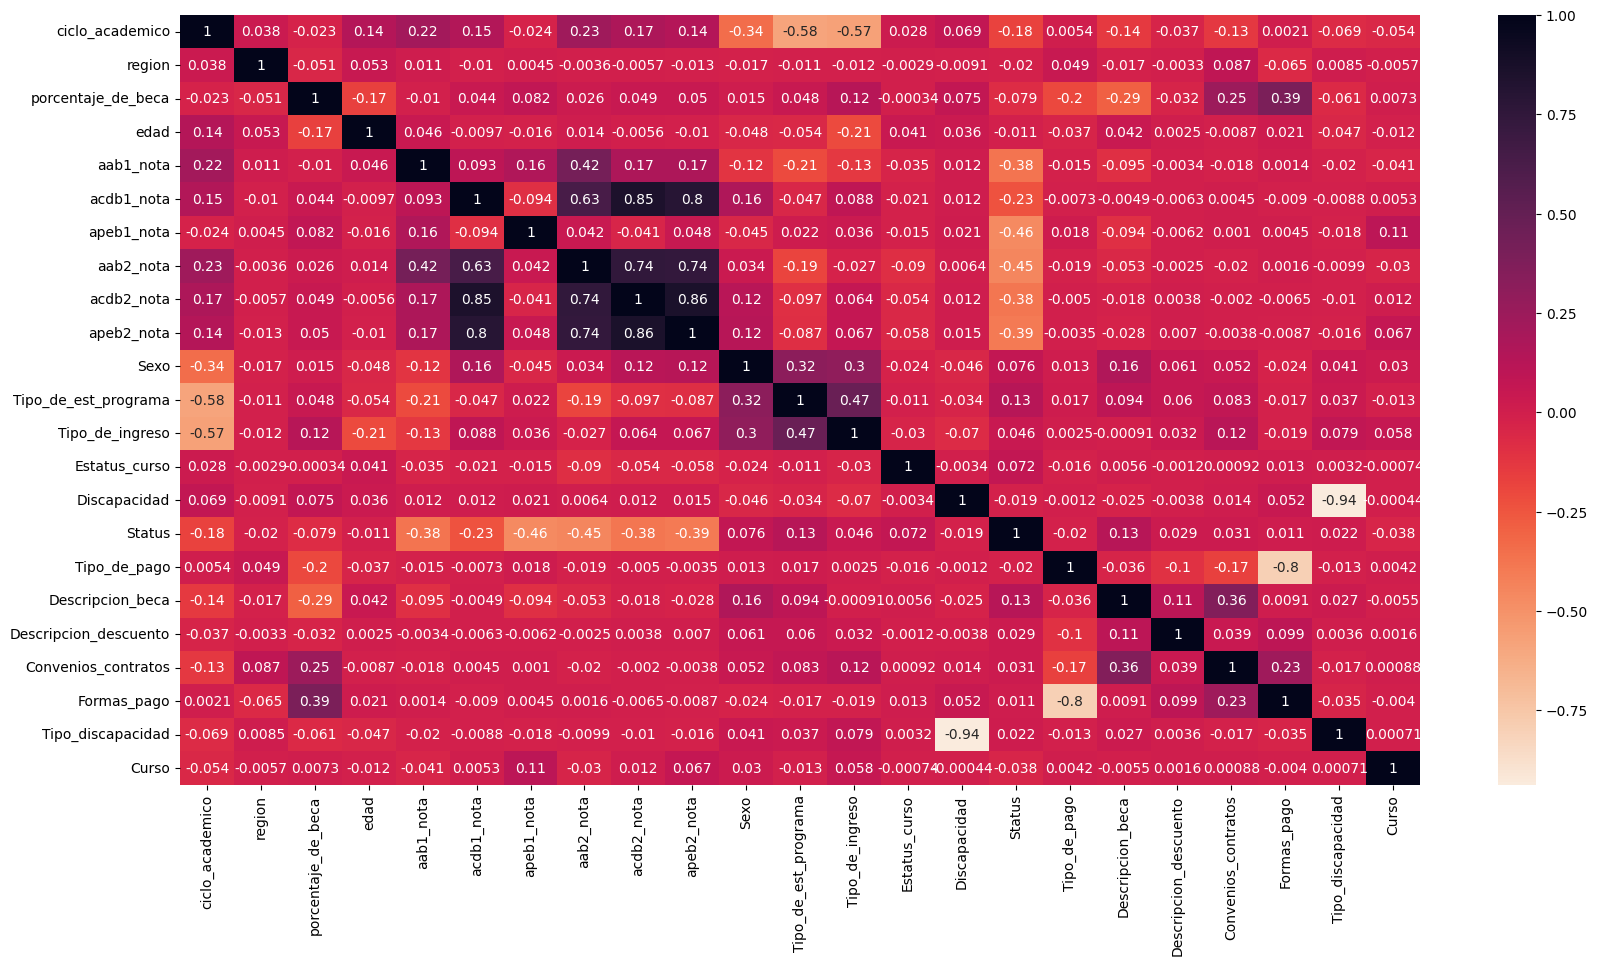

In [39]:
correlation = dataframe.corr()
plt.figure(figsize=(20, 10))
sns.heatmap(correlation, annot=True, cmap='rocket_r')

# Mostrar el gráfico
plt.show()

In [4]:
###Importamos las librerias necesarias
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
# Dividir los datos en caracteristicas de entrada y de destino
# Features
x = dataframe.drop("Status" , axis=1)
x.info()
# Variable a predecir
y = dataframe['Status']
y.info()# Target variable

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 22823 entries, 0 to 22822
Data columns (total 22 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   ciclo_academico        22823 non-null  int64  
 1   region                 22823 non-null  int64  
 2   porcentaje_de_beca     22823 non-null  float64
 3   edad                   22823 non-null  float64
 4   aab1_nota              22823 non-null  float64
 5   acdb1_nota             22823 non-null  float64
 6   apeb1_nota             22823 non-null  float64
 7   aab2_nota              22823 non-null  float64
 8   acdb2_nota             22823 non-null  float64
 9   apeb2_nota             22823 non-null  float64
 10  Sexo                   22823 non-null  int64  
 11  Tipo_de_est_programa   22823 non-null  int64  
 12  Tipo_de_ingreso        22823 non-null  int64  
 13  Estatus_curso          22823 non-null  int64  
 14  Discapacidad           22823 non-null  int64  
 15  Ti

Preprocesamiento del conjunto de datos

In [5]:
# Estandarizamos el conjunto de datos
scaler = StandardScaler()
dataframe = scaler.fit_transform(x)

División del conjunto de datos en datos de entrenamiento y prueba

In [6]:
#Dividir en conjunto de entrenamiento(train) y prueba(test)
X_train, X_test, y_train, y_test = train_test_split(x, y, test_size=0.2 , random_state=0)
#visualizamos cuantos datos vamos a tener en prueba y entrenamiento
print("shape")
print("x_train", X_train.shape)
print("x_test",X_test.shape)
print("y_train", y_train.shape)
print("y_test", y_test.shape)

shape
x_train (18258, 22)
x_test (4565, 22)
y_train (18258,)
y_test (4565,)


In [7]:
#construimos un arreglo donde se guardaran todos los modelos
#para hacer una comparación de todos, para ver cual da mejor
#resultado
compare_models_accuracy = {}

Modelo de Regresión Logística

In [8]:
#importamos las librerias
from sklearn.linear_model import LogisticRegression
# Creata el modelo de Regresión Logística
lr_model = LogisticRegression()
#Construimos el modelo sobre los datos de entrenamiento
lr_model.fit(X_train, y_train)

C:\Users\A S U S\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\sklearn\linear_model\_logistic.py:460: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression()

In [9]:
#Predecimos para los valores del grupo Test
y_pred = lr_model.predict(X_test)

In [167]:
print(y_pred)

[0 0 0 ... 0 0 0]


In [168]:
np.mean(y_pred == y_test)

0.9130339539978094

In [10]:
# Evaluamos el modelo
from sklearn.metrics import recall_score


print("Accuracy:", accuracy_score(y_test, y_pred))
#agregamos la evaluación del modelo a nuestro arreglo
compare_models_accuracy["logistic_regression"]=int(accuracy_score(y_test, y_pred) * 100)
#Hacemos un reporte de clasificación
print("\nClassification Report:\n", classification_report(y_test, y_pred))
print("\nSensibilidad:\n", recall_score(y_test, y_pred))

#realizamos la matriz de confusión
print("\nConfusion Matrix:\n", confusion_matrix(y_test, y_pred))

Accuracy: 0.9130339539978094

Classification Report:
               precision    recall  f1-score   support

           0       0.93      0.97      0.95      3844
           1       0.79      0.61      0.69       721

    accuracy                           0.91      4565
   macro avg       0.86      0.79      0.82      4565
weighted avg       0.91      0.91      0.91      4565


Sensibilidad:
 0.6116504854368932

Confusion Matrix:
 [[3727  117]
 [ 280  441]]


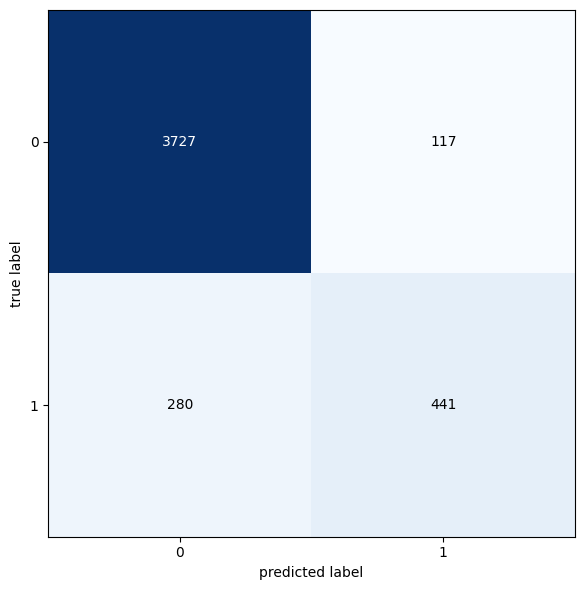

In [11]:
from sklearn.metrics import confusion_matrix
from mlxtend.plotting import plot_confusion_matrix

matriz = confusion_matrix(y_test,y_pred)

plot_confusion_matrix(conf_mat =matriz,figsize=(6,6),
                      show_normed=False)
plt.tight_layout()

In [12]:
#Verifico la matriz de Confusión
from tkinter import NO
from sklearn import metrics
from sklearn.metrics import confusion_matrix

matriz = confusion_matrix(y_test, y_pred)
print('Matriz de Confusión:')
print(matriz)

#Calculo la precisión del modelo
from sklearn.metrics import precision_score

precision = precision_score(y_test, y_pred)
print('Precisión del modelo:')
print(precision)

#Calculo la exactitud del modelo
from sklearn.metrics import accuracy_score

exactitud = accuracy_score(y_test, y_pred)
print('Exactitud del modelo:')
print(exactitud)

#Calculo la sensibilidad del modelo
from sklearn.metrics import recall_score

sensibilidad = metrics.recall_score(y_test, y_pred)
print('Sensibilidad del modelo:')
print(sensibilidad)

#Calculo la especifidad del modelo
from sklearn.metrics import recall_score

especifidad = recall_score(y_test, y_pred, pos_label=0)
print('Especifidad del modelo:')
print(especifidad)

#Calculo el Puntaje F1 del modelo
from sklearn.metrics import f1_score

puntajef1 = f1_score(y_test, y_pred)
print('Puntaje F1 del modelo:')
print(puntajef1)

#Calculo la curva ROC - AUC del modelo
from sklearn.metrics import roc_auc_score

roc_auc = roc_auc_score(y_test, y_pred)
print('Curva ROC - AUC del modelo:')
print(roc_auc)

Matriz de Confusión:
[[3727  117]
 [ 280  441]]
Precisión del modelo:
0.7903225806451613
Exactitud del modelo:
0.9130339539978094
Sensibilidad del modelo:
0.6116504854368932
Especifidad del modelo:
0.9695629552549427
Puntaje F1 del modelo:
0.689601250977326
Curva ROC - AUC del modelo:
0.790606720345918


Modelo K-NN

In [13]:
from sklearn.neighbors import KNeighborsClassifier
# Creata el modelo de K-NN
knn_model = KNeighborsClassifier(n_neighbors=5)
#Construimos el modelo sobre los datos de entrenamiento
knn_model.fit(X_train, y_train)


KNeighborsClassifier()

In [14]:
#Realizar predicciones
y_pred = knn_model.predict(X_test)

C:\Users\A S U S\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\joblib\externals\loky\backend\context.py:136: UserWarning: Could not find the number of physical cores for the following reason:
found 0 physical cores < 1
Returning the number of logical cores instead. You can silence this warning by setting LOKY_MAX_CPU_COUNT to the number of cores you want to use.
  warnings.warn(
  File "C:\Users\A S U S\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\joblib\externals\loky\backend\context.py", line 282, in _count_physical_cores
    raise ValueError(f"found {cpu_count_physical} physical cores < 1")


In [15]:
# Evaluar el modelo
print("Accuracy:", accuracy_score(y_test, y_pred))
#Se agrega en el arreglo
compare_models_accuracy["K-NN"]=int(accuracy_score(y_test, y_pred) * 100)
print("\nClassification Report:\n", classification_report(y_test, y_pred))
print("\nConfusion Matrix:\n", confusion_matrix(y_test, y_pred))

Accuracy: 0.9187294633077766

Classification Report:
               precision    recall  f1-score   support

           0       0.92      0.99      0.95      3844
           1       0.93      0.53      0.67       721

    accuracy                           0.92      4565
   macro avg       0.92      0.76      0.81      4565
weighted avg       0.92      0.92      0.91      4565


Confusion Matrix:
 [[3814   30]
 [ 341  380]]


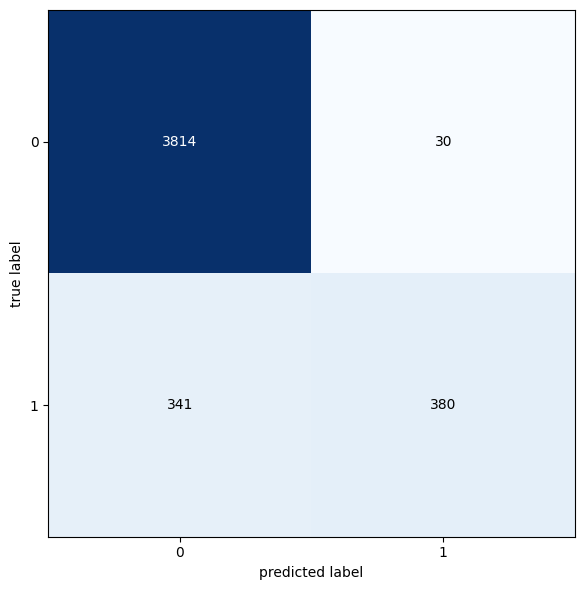

In [16]:
from sklearn.metrics import confusion_matrix
from mlxtend.plotting import plot_confusion_matrix

matriz = confusion_matrix(y_test,y_pred)

plot_confusion_matrix(conf_mat =matriz,figsize=(6,6),
                      show_normed=False)
plt.tight_layout()

In [17]:
#Verifico la matriz de Confusión
from sklearn.metrics import confusion_matrix

matriz = confusion_matrix(y_test, y_pred)
print('Matriz de Confusión:')
print(matriz)

#Calculo la precisión del modelo
from sklearn.metrics import precision_score

precision = precision_score(y_test, y_pred)
print('Precisión del modelo:')
print(precision)

#Calculo la exactitud del modelo
from sklearn.metrics import accuracy_score

exactitud = accuracy_score(y_test, y_pred)
print('Exactitud del modelo:')
print(exactitud)

#Calculo la sensibilidad del modelo
from sklearn.metrics import recall_score

sensibilidad = recall_score(y_test, y_pred)
print('Sensibilidad del modelo:')
print(sensibilidad)

#Calculo la especifidad del modelo
from sklearn.metrics import recall_score

especifidad = recall_score(y_test, y_pred, pos_label=0)
print('Especifidad del modelo:')
print(especifidad)

#Calculo el Puntaje F1 del modelo
from sklearn.metrics import f1_score

puntajef1 = f1_score(y_test, y_pred)
print('Puntaje F1 del modelo:')
print(puntajef1)

#Calculo la curva ROC - AUC del modelo
from sklearn.metrics import roc_auc_score

roc_auc = roc_auc_score(y_test, y_pred)
print('Curva ROC - AUC del modelo:')
print(roc_auc)

Matriz de Confusión:
[[3814   30]
 [ 341  380]]
Precisión del modelo:
0.926829268292683
Exactitud del modelo:
0.9187294633077766
Sensibilidad del modelo:
0.5270457697642164
Especifidad del modelo:
0.9921956295525495
Puntaje F1 del modelo:
0.671971706454465
Curva ROC - AUC del modelo:
0.7596206996583829


Modelo de Árbol de Decisión

In [18]:
from sklearn.tree import DecisionTreeClassifier
# Creata el modelo de Árbol de Decisión
dtr_model = DecisionTreeClassifier(max_depth=5)
#Construimos el modelo sobre los datos de entrenamiento
dtr_model.fit(X_train, y_train)

DecisionTreeClassifier(max_depth=5)

In [19]:
# Predecimos para los valores del grupo Test
y_pred = dtr_model.predict(X_test)

In [20]:
# Evaluar el modelo
print("Accuracy:", accuracy_score(y_test, y_pred))
#Se agrega en el arreglo
compare_models_accuracy["decision_tree"]=int(accuracy_score(y_test, y_pred) * 100)
print("\nClassification Report:\n", classification_report(y_test, y_pred))
print("\nConfusion Matrix:\n", confusion_matrix(y_test, y_pred))

Accuracy: 0.9215772179627602

Classification Report:
               precision    recall  f1-score   support

           0       0.96      0.94      0.95      3844
           1       0.73      0.80      0.76       721

    accuracy                           0.92      4565
   macro avg       0.85      0.87      0.86      4565
weighted avg       0.93      0.92      0.92      4565


Confusion Matrix:
 [[3628  216]
 [ 142  579]]


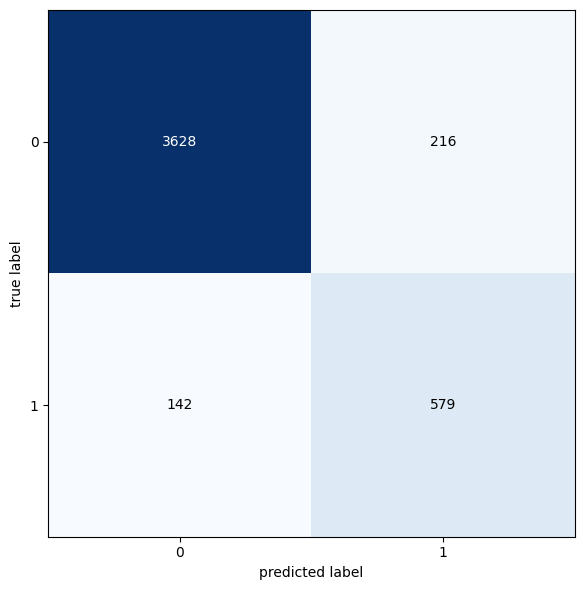

In [21]:
from sklearn.metrics import confusion_matrix
from mlxtend.plotting import plot_confusion_matrix

matriz = confusion_matrix(y_test,y_pred)

plot_confusion_matrix(conf_mat =matriz,figsize=(6,6),
                      show_normed=False)
plt.tight_layout()

[Text(0.4363207547169811, 0.9166666666666666, 'aab2_nota <= 0.695\ngini = 0.27\nsamples = 18258\nvalue = [15324, 2934]'),
 Text(0.17452830188679244, 0.75, 'apeb1_nota <= 3.07\ngini = 0.158\nsamples = 1042\nvalue = [90, 952]'),
 Text(0.07547169811320754, 0.5833333333333334, 'acdb2_nota <= 3.225\ngini = 0.073\nsamples = 917\nvalue = [35, 882]'),
 Text(0.03773584905660377, 0.4166666666666667, 'aab2_nota <= 0.34\ngini = 0.056\nsamples = 899\nvalue = [26, 873]'),
 Text(0.018867924528301886, 0.25, 'gini = 0.0\nsamples = 602\nvalue = [0, 602]'),
 Text(0.05660377358490566, 0.25, 'acdb1_nota <= -0.5\ngini = 0.16\nsamples = 297\nvalue = [26, 271]'),
 Text(0.03773584905660377, 0.08333333333333333, 'gini = 0.349\nsamples = 80\nvalue = [18, 62]'),
 Text(0.07547169811320754, 0.08333333333333333, 'gini = 0.071\nsamples = 217\nvalue = [8, 209]'),
 Text(0.11320754716981132, 0.4166666666666667, 'acdb1_nota <= 2.825\ngini = 0.5\nsamples = 18\nvalue = [9, 9]'),
 Text(0.09433962264150944, 0.25, 'gini = 0.0

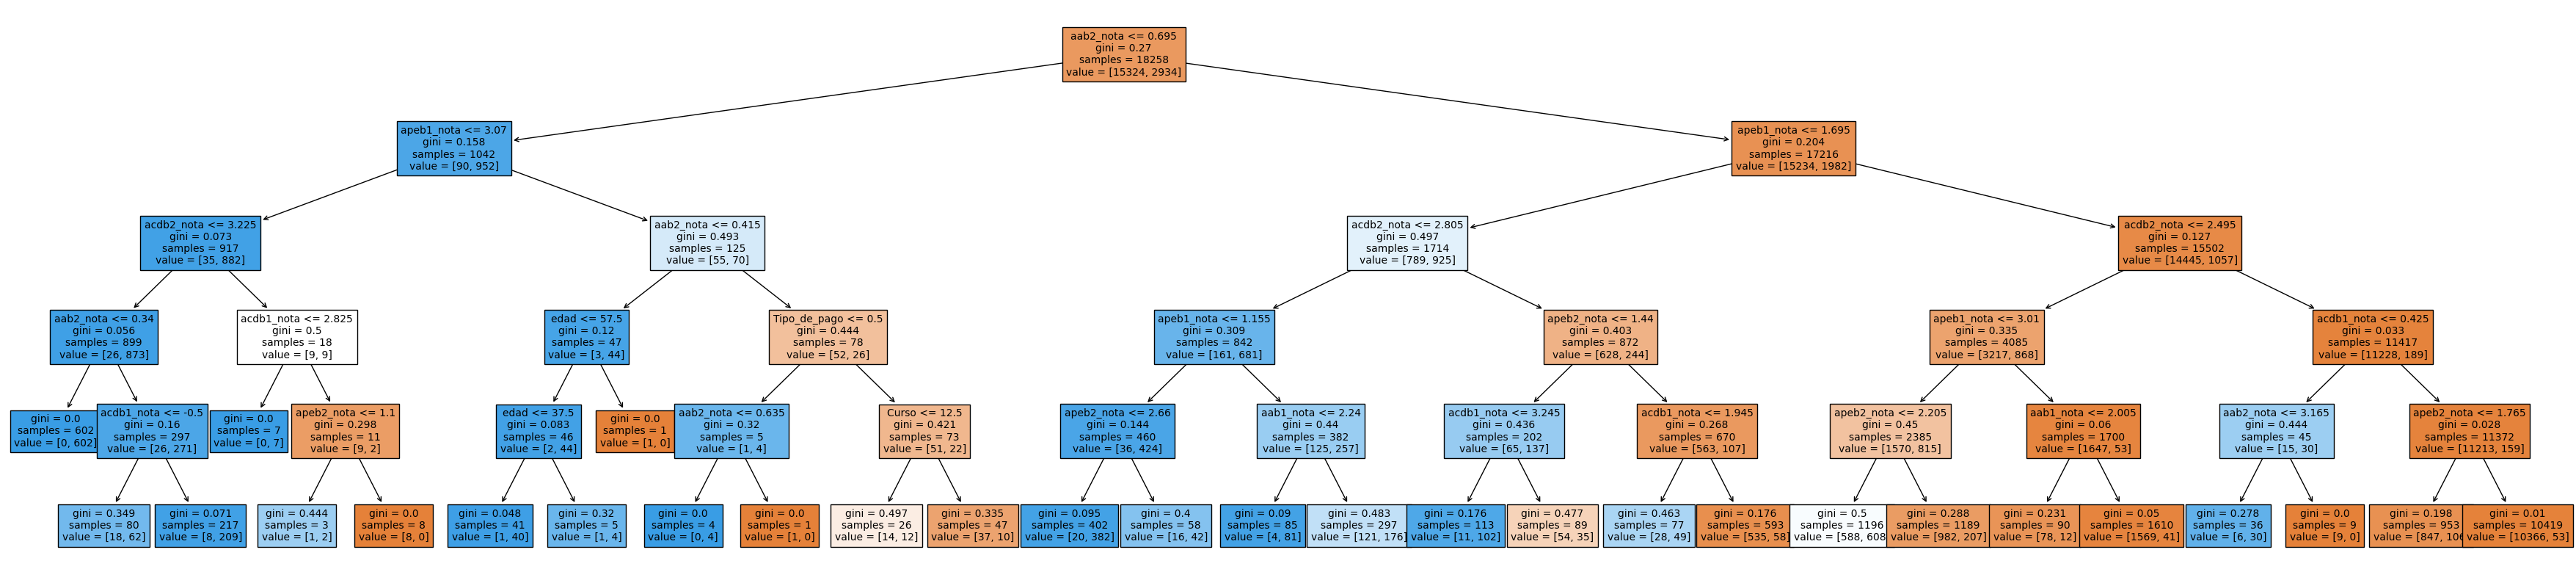

In [184]:
from sklearn.tree import plot_tree

plt.figure(figsize=(45,10))
plot_tree(decision_tree = dtr_model, feature_names= x.columns, filled=True, fontsize= 10)

In [22]:
#Verifico la matriz de Confusión
from sklearn.metrics import confusion_matrix

matriz = confusion_matrix(y_test, y_pred)
print('Matriz de Confusión:')
print(matriz)

#Calculo la precisión del modelo
from sklearn.metrics import precision_score

precision = precision_score(y_test, y_pred)
print('Precisión del modelo:')
print(precision)

#Calculo la exactitud del modelo
from sklearn.metrics import accuracy_score

exactitud = accuracy_score(y_test, y_pred)
print('Exactitud del modelo:')
print(exactitud)

#Calculo la sensibilidad del modelo
from sklearn.metrics import recall_score

sensibilidad = recall_score(y_test, y_pred)
print('Sensibilidad del modelo:')
print(sensibilidad)

#Calculo la especifidad del modelo
from sklearn.metrics import recall_score

especifidad = recall_score(y_test, y_pred, pos_label=0)
print('Especifidad del modelo:')
print(especifidad)

#Calculo el Puntaje F1 del modelo
from sklearn.metrics import f1_score

puntajef1 = f1_score(y_test, y_pred)
print('Puntaje F1 del modelo:')
print(puntajef1)

#Calculo la curva ROC - AUC del modelo
from sklearn.metrics import roc_auc_score

roc_auc = roc_auc_score(y_test, y_pred)
print('Curva ROC - AUC del modelo:')
print(roc_auc)

Matriz de Confusión:
[[3628  216]
 [ 142  579]]
Precisión del modelo:
0.7283018867924528
Exactitud del modelo:
0.9215772179627602
Sensibilidad del modelo:
0.8030513176144244
Especifidad del modelo:
0.9438085327783559
Puntaje F1 del modelo:
0.7638522427440633
Curva ROC - AUC del modelo:
0.8734299251963902


Modelo Support Vector Machine

In [23]:
from sklearn.svm import SVC
# Crear el modelo de Support Vector Machine
svm_model = SVC()
#Construimos el modelo sobre los datos de entrenamiento
svm_model.fit(X_train, y_train)

SVC()

In [24]:
# Predecimos para los valores del grupo Test
y_pred = svm_model.predict(X_test)

In [25]:
# Evaluar el modelo
print("Accuracy:", accuracy_score(y_test, y_pred))
#Se agrega en el arreglo
compare_models_accuracy["svm"]=int(accuracy_score(y_test, y_pred) * 100)
print("\nClassification Report:\n", classification_report(y_test, y_pred))
print("\nConfusion Matrix:\n", confusion_matrix(y_test, y_pred))

Accuracy: 0.8968236582694414

Classification Report:
               precision    recall  f1-score   support

           0       0.89      1.00      0.94      3844
           1       0.93      0.37      0.53       721

    accuracy                           0.90      4565
   macro avg       0.91      0.68      0.74      4565
weighted avg       0.90      0.90      0.88      4565


Confusion Matrix:
 [[3825   19]
 [ 452  269]]


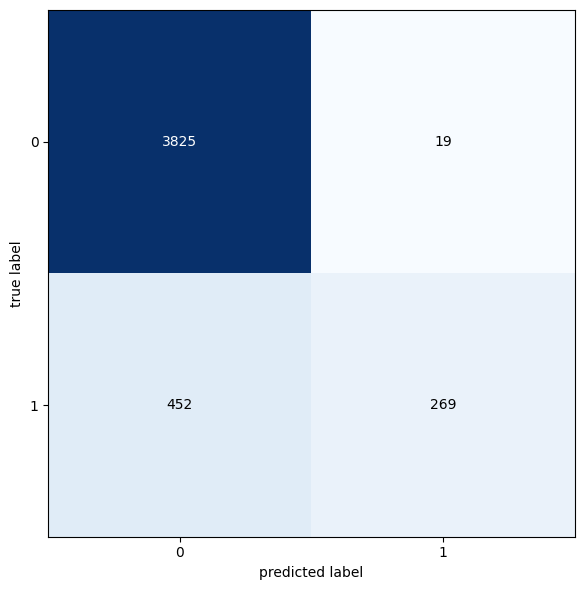

In [26]:
from sklearn.metrics import confusion_matrix
from mlxtend.plotting import plot_confusion_matrix

matriz = confusion_matrix(y_test,y_pred)

plot_confusion_matrix(conf_mat =matriz,figsize=(6,6),
                      show_normed=False)
plt.tight_layout()

In [27]:
#Verifico la matriz de Confusión
from sklearn.metrics import confusion_matrix

matriz = confusion_matrix(y_test, y_pred)
print('Matriz de Confusión:')
print(matriz)

#Calculo la precisión del modelo
from sklearn.metrics import precision_score

precision = precision_score(y_test, y_pred)
print('Precisión del modelo:')
print(precision)

#Calculo la exactitud del modelo
from sklearn.metrics import accuracy_score

exactitud = accuracy_score(y_test, y_pred)
print('Exactitud del modelo:')
print(exactitud)

#Calculo la sensibilidad del modelo
from sklearn.metrics import recall_score

sensibilidad = recall_score(y_test, y_pred)
print('Sensibilidad del modelo:')
print(sensibilidad)

#Calculo la especifidad del modelo
from sklearn.metrics import recall_score

especifidad = recall_score(y_test, y_pred, pos_label=0)
print('Especifidad del modelo:')
print(especifidad)

#Calculo el Puntaje F1 del modelo
from sklearn.metrics import f1_score

puntajef1 = f1_score(y_test, y_pred)
print('Puntaje F1 del modelo:')
print(puntajef1)

#Calculo la curva ROC - AUC del modelo
from sklearn.metrics import roc_auc_score

roc_auc = roc_auc_score(y_test, y_pred)
print('Curva ROC - AUC del modelo:')
print(roc_auc)

Matriz de Confusión:
[[3825   19]
 [ 452  269]]
Precisión del modelo:
0.9340277777777778
Exactitud del modelo:
0.8968236582694414
Sensibilidad del modelo:
0.37309292649098474
Especifidad del modelo:
0.995057232049948
Puntaje F1 del modelo:
0.533201189296333
Curva ROC - AUC del modelo:
0.6840750792704664


Modelo de Random Forest(Arboles Aleatorios)

In [28]:
from sklearn.ensemble import RandomForestClassifier
# Creata el modelo de Random Forest
rf_model = RandomForestClassifier(n_estimators=100, max_depth=6)
#Construimos el modelo sobre los datos de entrenamiento
rf_model.fit(X_train, y_train)

RandomForestClassifier(max_depth=6)

In [29]:
# Predecimos para los valores del grupo Test
y_pred = rf_model.predict(X_test)

In [30]:
# Evaluar el modelo
print("Accuracy:", accuracy_score(y_test, y_pred))
#Se agrega en el arreglo
compare_models_accuracy["random_forest"]=int(accuracy_score(y_test, y_pred) * 100)
print("\nClassification Report:\n", classification_report(y_test, y_pred))
print("\nConfusion Matrix:\n", confusion_matrix(y_test, y_pred))

Accuracy: 0.9434830230010953

Classification Report:
               precision    recall  f1-score   support

           0       0.94      0.99      0.97      3844
           1       0.96      0.67      0.79       721

    accuracy                           0.94      4565
   macro avg       0.95      0.83      0.88      4565
weighted avg       0.94      0.94      0.94      4565


Confusion Matrix:
 [[3824   20]
 [ 238  483]]


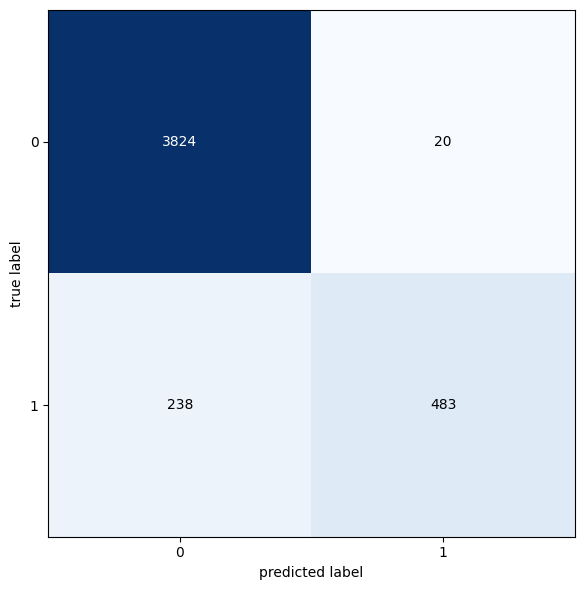

In [31]:
from sklearn.metrics import confusion_matrix
from mlxtend.plotting import plot_confusion_matrix

matriz = confusion_matrix(y_test,y_pred)

plot_confusion_matrix(conf_mat =matriz,figsize=(6,6),
                      show_normed=False)
plt.tight_layout()

In [32]:
#Verifico la matriz de Confusión
from sklearn.metrics import confusion_matrix

matriz = confusion_matrix(y_test, y_pred)
print('Matriz de Confusión:')
print(matriz)

#Calculo la precisión del modelo
from sklearn.metrics import precision_score

precision = precision_score(y_test, y_pred)
print('Precisión del modelo:')
print(precision)

#Calculo la exactitud del modelo
from sklearn.metrics import accuracy_score

exactitud = accuracy_score(y_test, y_pred)
print('Exactitud del modelo:')
print(exactitud)

#Calculo la sensibilidad del modelo
from sklearn.metrics import recall_score

sensibilidad = recall_score(y_test, y_pred)
print('Sensibilidad del modelo:')
print(sensibilidad)

#Calculo la especifidad del modelo
from sklearn.metrics import recall_score

especifidad = recall_score(y_test, y_pred, pos_label=0)
print('Especifidad del modelo:')
print(especifidad)

#Calculo el Puntaje F1 del modelo
from sklearn.metrics import f1_score

puntajef1 = f1_score(y_test, y_pred)
print('Puntaje F1 del modelo:')
print(puntajef1)

#Calculo la curva ROC - AUC del modelo
from sklearn.metrics import roc_auc_score

roc_auc = roc_auc_score(y_test, y_pred)
print('Curva ROC - AUC del modelo:')
print(roc_auc)

Matriz de Confusión:
[[3824   20]
 [ 238  483]]
Precisión del modelo:
0.9602385685884692
Exactitud del modelo:
0.9434830230010953
Sensibilidad del modelo:
0.6699029126213593
Especifidad del modelo:
0.9947970863683663
Puntaje F1 del modelo:
0.7892156862745098
Curva ROC - AUC del modelo:
0.8323499994948629


Modelo de Naive Bayes

In [33]:
from sklearn.naive_bayes import GaussianNB
# Creata el modelo de Naive Bayes
nb_model = GaussianNB()
#Construimos el modelo sobre los datos de entrenamiento
nb_model.fit(X_train, y_train)

GaussianNB()

In [34]:
# Predecimos para los valores del grupo Test
y_pred = nb_model.predict(X_test)

In [35]:
# Evaluar el modelo
print("Accuracy:", accuracy_score(y_test, y_pred))
#Se agrega en el arreglo
compare_models_accuracy["naive_bayes"]=int(accuracy_score(y_test, y_pred) * 100)
print("\nClassification Report:\n", classification_report(y_test, y_pred))
print("\nConfusion Matrix:\n", confusion_matrix(y_test, y_pred))

Accuracy: 0.8359255202628697

Classification Report:
               precision    recall  f1-score   support

           0       0.93      0.87      0.90      3844
           1       0.49      0.64      0.55       721

    accuracy                           0.84      4565
   macro avg       0.71      0.75      0.72      4565
weighted avg       0.86      0.84      0.84      4565


Confusion Matrix:
 [[3358  486]
 [ 263  458]]


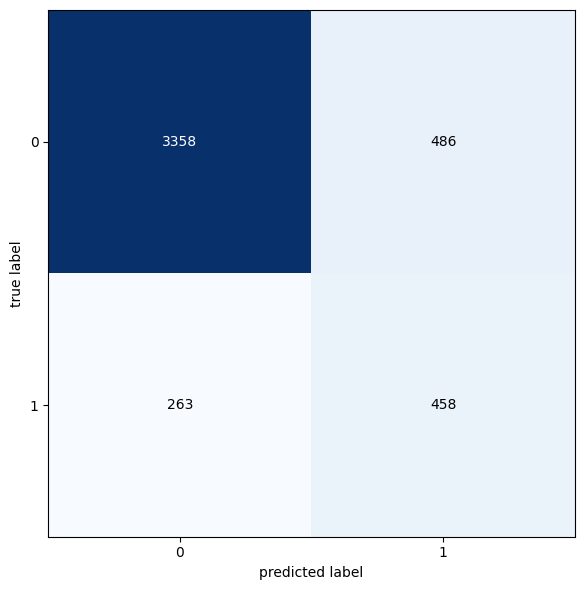

In [36]:
from sklearn.metrics import confusion_matrix
from mlxtend.plotting import plot_confusion_matrix

matriz = confusion_matrix(y_test,y_pred)

plot_confusion_matrix(conf_mat =matriz,figsize=(6,6),
                      show_normed=False)
plt.tight_layout()

In [37]:
#Verifico la matriz de Confusión
from sklearn.metrics import confusion_matrix

matriz = confusion_matrix(y_test, y_pred)
print('Matriz de Confusión:')
print(matriz)

#Calculo la precisión del modelo
from sklearn.metrics import precision_score

precision = precision_score(y_test, y_pred)
print('Precisión del modelo:')
print(precision)

#Calculo la exactitud del modelo
from sklearn.metrics import accuracy_score

exactitud = accuracy_score(y_test, y_pred)
print('Exactitud del modelo:')
print(exactitud)

#Calculo la sensibilidad del modelo
from sklearn.metrics import recall_score

sensibilidad = recall_score(y_test, y_pred)
print('Sensibilidad del modelo:')
print(sensibilidad)

#Calculo la especifidad del modelo
from sklearn.metrics import recall_score

especifidad = recall_score(y_test, y_pred, pos_label=0)
print('Especifidad del modelo:')
print(especifidad)

#Calculo el Puntaje F1 del modelo
from sklearn.metrics import f1_score

puntajef1 = f1_score(y_test, y_pred)
print('Puntaje F1 del modelo:')
print(puntajef1)

#Calculo la curva ROC - AUC del modelo
from sklearn.metrics import roc_auc_score

roc_auc = roc_auc_score(y_test, y_pred)
print('Curva ROC - AUC del modelo:')
print(roc_auc)

Matriz de Confusión:
[[3358  486]
 [ 263  458]]
Precisión del modelo:
0.4851694915254237
Exactitud del modelo:
0.8359255202628697
Sensibilidad del modelo:
0.6352288488210819
Especifidad del modelo:
0.8735691987513007
Puntaje F1 del modelo:
0.5501501501501501
Curva ROC - AUC del modelo:
0.7543990237861914


Comparación de la precisión de todos los modelos

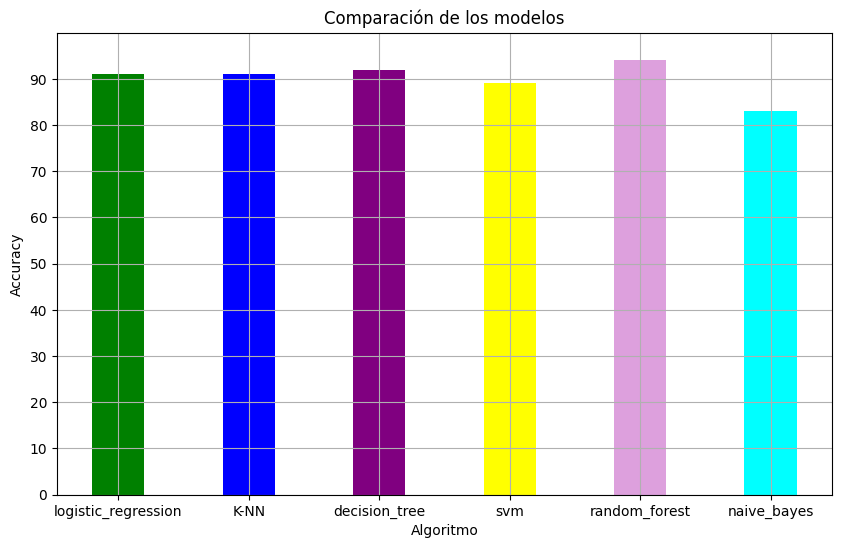

In [200]:
from matplotlib import colors

x = list(compare_models_accuracy.keys())
y = list(compare_models_accuracy.values())
colors= ['green','blue','purple','yellow', 'plum', 'aqua'] # Colores de los items

plt.figure(figsize=(10 ,6))
plt.title("Comparación de los modelos")
plt.grid(True)
plt.bar( x , y ,color = colors, width=0.4 )
plt.xlabel('Algoritmo')
plt.ylabel('Accuracy')
plt.ylim(0, 100)  # Set the y-axis limits
plt.yticks(np.arange(0, 100, 10)) 
plt.show()